In some cases we may have calculated the reference data outside of a QCArchive instance and so in this notebook we will walk through how to mock QCArchive data objects using our local results and how to insert them into a bespokefit optimization schema.

In [1]:
from openff.bespokefit.workflows import BespokeWorkflowFactory
from openff.toolkit.topology import Molecule

Start by creating a normal workflow factory and an optimization schema for a set of input molecules.

In [2]:
# create a normal workflow factory
workflow = BespokeWorkflowFactory()

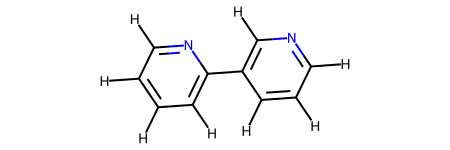

In [3]:
# use a molecule whos torsiondrive we know is in QCArchive
target_molecule = Molecule.from_mapped_smiles("[H:13][c:1]1[c:2]([c:7]([n:12][c:10]([c:5]1[H:17])[c:9]2[c:4]([c:3]([c:6]([n:11][c:8]2[H:20])[H:18])[H:15])[H:16])[H:19])[H:14]")
target_molecule

In [4]:
# create a normal bespoke optimization schema for the molecule
schema = workflow.optimization_schemas_from_molecules(target_molecule)

Building Fitting Schema : 100%|███████████████████| 1/1 [00:00<00:00,  1.12it/s]


We can then examine the schema to work out what tasks should be run locally. For each optimization schema there is a list of targets, in this case there is one which is a torsiondrive. For each target there will be a list of tasks to be done in order to fit the target. Here we have one torsiondrive to perform for the one rotatable bond. Note the program, basis and method is also defined along with the targeted dihedral in the molecule/fragment.

In [5]:
schema[0].targets[0].dict()

{'weight': 1.0,
 'reference_data': {'type': 'bespoke',
  'qc_spec': {'method': 'B3LYP-D3BJ',
   'basis': 'DZVP',
   'program': 'psi4',
   'spec_name': 'default',
   'spec_description': 'Standard OpenFF optimization quantum chemistry specification.',
   'store_wavefunction': 'none',
   'implicit_solvent': None,
   'keywords': None},
  'target_conformers': 4,
  'tasks': [{'task_type': 'torsion1d',
    'name': 'torsion1d-0',
    'attributes': {'canonical_smiles': 'c1ccnc(c1)c2cccnc2',
     'canonical_isomeric_smiles': 'c1ccnc(c1)c2cccnc2',
     'canonical_explicit_hydrogen_smiles': '[H]c1c(c(nc(c1[H])c2c(c(c(nc2[H])[H])[H])[H])[H])[H]',
     'canonical_isomeric_explicit_hydrogen_smiles': '[H]c1c(c(nc(c1[H])c2c(c(c(nc2[H])[H])[H])[H])[H])[H]',
     'canonical_isomeric_explicit_hydrogen_mapped_smiles': '[H:1][c:2]1[c:3]([c:4]([n:5][c:6]([c:7]1[H:8])[c:9]2[c:10]([c:11]([c:12]([n:13][c:14]2[H:15])[H:16])[H:17])[H:18])[H:19])[H:20]',
     'molecular_formula': 'C10H8N2',
     'standard_inchi': 

For the example here we will be using a result that was computed in qcarchive, but this can be computedlocally using any prefered method.

In [6]:
# find the result in QCarchive
from openff.qcsubmit.results import TorsionDriveResultCollection
from openff.qcsubmit.results.filters import SMILESFilter
from qcportal import FractalClient

In [7]:
results = TorsionDriveResultCollection.from_server(client=FractalClient(), datasets="OpenFF Rowley Biaryl v1.0", spec_name="default")

In [8]:
# filter for just the molecule we want
single_result = results.filter(SMILESFilter(smiles_to_include=["[H:13][c:1]1[c:2]([c:7]([n:12][c:10]([c:5]1[H:17])[c:9]2[c:4]([c:3]([c:6]([n:11][c:8]2[H:20])[H:18])[H:15])[H:16])[H:19])[H:14]"]))

In [9]:
single_result

TorsionDriveResultCollection(entries={'https://api.qcarchive.molssi.org:443/': [TorsionDriveResult(type='torsion', record_id='21272352', cmiles='[H:13][c:1]1[c:2]([c:7]([n:12][c:10]([c:5]1[H:17])[c:9]2[c:4]([c:3]([c:6]([n:11][c:8]2[H:20])[H:18])[H:15])[H:16])[H:19])[H:14]', inchi_key='VEKIYFGCEAJDDT-UHFFFAOYSA-N')]}, provenance={'applied-filters': {'SMILESFilter-0': {'smiles_to_include': ['[H:13][c:1]1[c:2]([c:7]([n:12][c:10]([c:5]1[H:17])[c:9]2[c:4]([c:3]([c:6]([n:11][c:8]2[H:20])[H:18])[H:15])[H:16])[H:19])[H:14]'], 'smiles_to_exclude': None}}})

In [10]:
# get the molecule and record
record, molecule = single_result.to_records()[0]

In [11]:
record.dict()

{'id': '21272352',
 'hash_index': '0c17422a95b398de854dad4a48c310da4b21e6ec',
 'procedure': 'torsiondrive',
 'program': 'torsiondrive',
 'version': 1,
 'protocols': None,
 'extras': {},
 'stdout': None,
 'stderr': None,
 'error': None,
 'manager_name': None,
 'status': <RecordStatusEnum.complete: 'COMPLETE'>,
 'modified_on': datetime.datetime(2020, 7, 21, 16, 42, 21, 802329),
 'created_on': datetime.datetime(2020, 7, 21, 16, 42, 21, 802333),
 'provenance': {'creator': 'torsiondrive',
  'version': 'v0.9.8.1',
  'routine': 'torsiondrive.td_api'},
 'initial_molecule': ['14774116', '14774117'],
 'keywords': {'dihedrals': [(3, 8, 9, 11)],
  'grid_spacing': [15],
  'dihedral_ranges': None,
  'energy_decrease_thresh': None,
  'energy_upper_limit': 0.05},
 'optimization_spec': {'program': 'geometric',
  'keywords': {'coordsys': 'tric',
   'enforce': 0.1,
   'epsilon': 0,
   'reset': True,
   'qccnv': True,
   'molcnv': False,
   'check': 0,
   'trust': 0.1,
   'tmax': 0.3,
   'maxiter': 300,
 

In [12]:
molecule

NGLWidget(max_frame=23)

Now we need to build a refernce data object to hold the local results, we do this by mocking a QCArchive data object.

In [13]:
# get the only task for the molecule
qc_submit_task = schema[0].targets[0].reference_data.tasks[0].get_qcsubmit_task()
qc_submit_task

TorsionDriveEntry(index='[H]c1c(c([n:1][c:2](c1[H])[c:3]2c(c(c(n[c:4]2[H])[H])[H])[H])[H])[H]', initial_molecules=[Molecule(name='C10H8N2', formula='C10H8N2', hash='f399af6'), Molecule(name='C10H8N2', formula='C10H8N2', hash='14a4033')], attributes=MoleculeAttributes(canonical_smiles='c1ccnc(c1)c2cccnc2', canonical_isomeric_smiles='c1ccnc(c1)c2cccnc2', canonical_explicit_hydrogen_smiles='[H]c1c(c(nc(c1[H])c2c(c(c(nc2[H])[H])[H])[H])[H])[H]', canonical_isomeric_explicit_hydrogen_smiles='[H]c1c(c(nc(c1[H])c2c(c(c(nc2[H])[H])[H])[H])[H])[H]', canonical_isomeric_explicit_hydrogen_mapped_smiles='[H:1][c:2]1[c:3]([c:4]([n:5][c:6]([c:7]1[H:8])[c:9]2[c:10]([c:11]([c:12]([n:13][c:14]2[H:15])[H:16])[H:17])[H:18])[H:19])[H:20]', molecular_formula='C10H8N2', standard_inchi='InChI=1S/C10H8N2/c1-2-7-12-10(5-1)9-4-3-6-11-8-9/h1-8H', inchi_key='VEKIYFGCEAJDDT-UHFFFAOYSA-N', fixed_hydrogen_inchi='InChI=1/C10H8N2/c1-2-7-12-10(5-1)9-4-3-6-11-8-9/h1-8H', fixed_hydrogen_inchi_key='VEKIYFGCEAJDDT-UHFFFAOYNA

In [14]:
# get the QC settings
schema[0].targets[0].reference_data.qc_spec.dict()

{'method': 'B3LYP-D3BJ',
 'basis': 'DZVP',
 'program': 'psi4',
 'spec_name': 'default',
 'spec_description': 'Standard OpenFF optimization quantum chemistry specification.',
 'store_wavefunction': 'none',
 'implicit_solvent': None,
 'keywords': None}

In [15]:
from qcportal.models.torsiondrive import TorsionDriveRecord, TDKeywords
from qcportal.models.common_models import OptimizationSpecification, QCSpecification

In [16]:
# build the keywords, here we do it from qcsubmit dataset data, but users should use the settings used to compute the data
keywords = TDKeywords(dihedrals=qc_submit_task.dihedrals, grid_spacing=[15], dihedral_ranges=[(-165, 180)])
keywords.dict()


{'dihedrals': [(4, 5, 8, 13)],
 'grid_spacing': [15],
 'dihedral_ranges': [(-165, 180)],
 'energy_decrease_thresh': None,
 'energy_upper_limit': None}

In [17]:
# build a qc_spec with the information used to generate the data
qc_spec = QCSpecification(driver="gradient", method="b3lyp-d3bj", basis="dzvp", program="psi4")

In [18]:
# optimization spec
opt_spec = OptimizationSpecification(program="geometric")

In [19]:
# fake the final_energy_dict, this is the only information we need to be acurate. 
# this dictionary should be of the format '[angle]': energy atomic units 
final_energy_dict = record.final_energy_dict
final_energy_dict

{'[-120]': -495.458343183822,
 '[60]': -495.4588883513142,
 '[-135]': -495.4603432960275,
 '[-105]': -495.45629016391206,
 '[45]': -495.4611240913525,
 '[75]': -495.4566091994841,
 '[-150]': -495.46139344710025,
 '[-90]': -495.4555248759604,
 '[30]': -495.4624247939775,
 '[90]': -495.455524426715,
 '[-165]': -495.4613483527107,
 '[-75]': -495.4566058219707,
 '[15]': -495.4625853346007,
 '[105]': -495.45629021802336,
 '[-60]': -495.4588873999391,
 '[0]': -495.4623643809971,
 '[120]': -495.458337620341,
 '[180]': -495.46105920094215,
 '[-45]': -495.4611229355636,
 '[-15]': -495.4625846218596,
 '[135]': -495.46034454391497,
 '[165]': -495.4613469204021,
 '[-30]': -495.4624246400845,
 '[150]': -495.46139287472744}

In [20]:
# make sure to give the record a unique id, this will be used later when setting up the files
mock_record = TorsionDriveRecord(id="1", initial_molecule=["1"], keywords=keywords, qc_spec=qc_spec, optimization_spec=opt_spec, final_energy_dict=final_energy_dict, optimization_history={}, minimum_positions={})

In [21]:
mock_record.dict()

{'id': '1',
 'hash_index': 'f6ce436b3965cc04ae0eab2ca920c555bec42b7f',
 'procedure': 'torsiondrive',
 'program': 'torsiondrive',
 'version': 1,
 'protocols': None,
 'extras': {},
 'stdout': None,
 'stderr': None,
 'error': None,
 'manager_name': None,
 'status': <RecordStatusEnum.incomplete: 'INCOMPLETE'>,
 'modified_on': datetime.datetime(2021, 7, 21, 14, 37, 48, 588653),
 'created_on': datetime.datetime(2021, 7, 21, 14, 37, 48, 588654),
 'provenance': None,
 'initial_molecule': ['1'],
 'keywords': {'dihedrals': [(4, 5, 8, 13)],
  'grid_spacing': [15],
  'dihedral_ranges': [(-165, 180)],
  'energy_decrease_thresh': None,
  'energy_upper_limit': None},
 'optimization_spec': {'program': 'geometric', 'keywords': None},
 'qc_spec': {'driver': <DriverEnum.gradient: 'gradient'>,
  'method': 'b3lyp-d3bj',
  'basis': 'dzvp',
  'keywords': None,
  'program': 'psi4'},
 'final_energy_dict': {'[-120]': -495.458343183822,
  '[60]': -495.4588883513142,
  '[-135]': -495.4603432960275,
  '[-105]': -4

In [22]:
# we also need a mapping from minimum energy conformers to angle
# this is just a dictionary of the following format, where the coordinates must be in the correct order
# coordinates must be in bohr!
conformers = dict((grid_id, conformer) for grid_id, conformer in zip(molecule.properties["grid_ids"], molecule.conformers))
conformers

{'[-120]': Quantity(value=array([[ 2.599560631664557 , -0.0249491731274814,  3.0714252529604282],
        [ 0.404259230723063 , -0.7476014898795613,  1.796212577464729 ],
        [ 2.4065728460498916, -3.760981616570785 , 13.441436937202617 ],
        [ 2.089313583294989 , -2.567923211925367 , 11.109905592886694 ],
        [ 3.119690739326389 , -1.1186297909892289,  5.4133868343181835],
        [ 2.477073124195905 , -6.400078664070376 , 13.509003694073236 ],
        [-1.165384225027728 , -2.5427701760382675,  2.934341237745134 ],
        [ 1.919770163290202 , -6.688343881956619 ,  9.228228932120759 ],
        [ 1.8703634161902591, -4.051233860297448 ,  8.931589413184179 ],
        [ 1.4266335910438834, -2.906169649536134 ,  6.403776515873009 ],
        [ 2.2375458781502564, -7.856737991685678 , 11.447715922028582 ],
        [-0.6945227905209784, -3.5998983976117276,  5.18522032832601  ],
        [ 3.8841807430621103,  1.3549714796859034,  2.2556857542287325],
        [-0.08661852594495

In [23]:
# we now need to save this data into the schema
from openff.bespokefit.schema.bespoke.tasks import TorsionTaskReferenceData
from simtk import unit

data = TorsionTaskReferenceData(cmiles="[H:13][c:1]1[c:2]([c:7]([n:12][c:10]([c:5]1[H:17])[c:9]2[c:4]([c:3]([c:6]([n:11][c:8]2[H:20])[H:18])[H:15])[H:16])[H:19])[H:14]", record=mock_record, conformers=conformers)
data.dict()

{'record': {'id': '1',
  'hash_index': 'f6ce436b3965cc04ae0eab2ca920c555bec42b7f',
  'procedure': 'torsiondrive',
  'program': 'torsiondrive',
  'version': 1,
  'protocols': None,
  'extras': {},
  'stdout': None,
  'stderr': None,
  'error': None,
  'manager_name': None,
  'status': <RecordStatusEnum.incomplete: 'INCOMPLETE'>,
  'modified_on': datetime.datetime(2021, 7, 21, 14, 37, 48, 588653),
  'created_on': datetime.datetime(2021, 7, 21, 14, 37, 48, 588654),
  'provenance': None,
  'initial_molecule': ['1'],
  'keywords': {'dihedrals': [(4, 5, 8, 13)],
   'grid_spacing': [15],
   'dihedral_ranges': [(-165, 180)],
   'energy_decrease_thresh': None,
   'energy_upper_limit': None},
  'optimization_spec': {'program': 'geometric', 'keywords': None},
  'qc_spec': {'driver': <DriverEnum.gradient: 'gradient'>,
   'method': 'b3lyp-d3bj',
   'basis': 'dzvp',
   'keywords': None,
   'program': 'psi4'},
  'final_energy_dict': {'[-120]': -495.458343183822,
   '[60]': -495.4588883513142,
   '[-1

In [24]:
data.molecule.conformers[0]

Quantity(value=array([[ 1.375628244637491 , -0.0132025338499367,  1.6253282488586405],
       [ 0.2139247721958228, -0.3956136712813936,  0.9505147619316741],
       [ 1.2735035065075764, -1.990225762114384 ,  7.112902108957443 ],
       [ 1.105617134709795 , -1.358886443099739 ,  5.879108855039421 ],
       [ 1.6508692443166564, -0.591953392828686 ,  2.8646409465235165],
       [ 1.3108106470647694, -3.3867757770125597,  7.148656896907998 ],
       [-0.6166947738305272, -1.3455760297232606,  1.5527865120276267],
       [ 1.0158986205847058, -3.5393191610139474,  4.883368447874033 ],
       [ 0.9897536959545683, -2.1438206349079976,  4.726393574599566 ],
       [ 0.7549419846891333, -1.5378787495524802,  3.3887325959158097],
       [ 1.1840582870670564, -4.157606697235865 ,  6.057870382828949 ],
       [-0.3675256331964599, -1.9049841935823528,  2.7439004312610957],
       [ 2.0554199322567492,  0.7170200284732973,  1.1936574960963906],
       [-0.0458365499720816,  0.0261116967395117,

In [25]:
# now we can store the data
schema[0].targets[0].reference_data.tasks[0].reference_data=data

In [26]:
# now check it can be fit
schema[0].targets[0].reference_data.ready_for_fitting

True

The schema is now ready for parameter optimization, here we have two choices we can use the executor class to setup and run the forcebalance optimizations in an automated way. Or we can just setup all of the files for optimization so they are ready to run manually.

In [27]:
# now try and fit automatically using the executor
from openff.bespokefit.bespoke import Executor

In [28]:
exc = Executor()

In [77]:
result_schema = exc.execute(*schema)

Searching for reference tasks
No reference tasks found... Not connecting to qcfractal
generating collection task queue ...
task queue now contains tasks.
starting main executor ...
looking for task in queuepulling task from collection queue

found optimizer task for  bespoke_task_0
preparing to optimize
sending task for optimization
making new fb folders in bespoke_task_0
making forcebalance file system in  bespoke_task_0


generating target directory for torsion-None


  0%|          | 0/1 [00:00<?, ?it/s]

Note: Failed to import the optional openff.evaluator package. 
Note: Failed to import the optional openff.recharge package.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


launching forcebalance
starting to collect finished tasks
collecting complete tasks...
pulling task from collection queue
OPT finished in folder /Users/joshua/Documents/Software/bespoke-fit/examples/bespoke_task_0
Finished task
killing workers

the collection queue is ending nowFound a complete task
tasks to do  1
tasks left 0
breaking out of task updates
all tasks done exporting to file.


In [122]:
# or just set up the files
from openff.bespokefit.optimizers.forcebalance import ForceBalanceInputFactory

In [124]:
# setup the files in the current working directory
ForceBalanceInputFactory.generate(".", optimization_schema=schema[0])

making forcebalance file system in  .


  0%|          | 0/1 [00:00<?, ?it/s]

generating target directory for torsion-1
Note: Failed to import the optional openff.evaluator package. 
Note: Failed to import the optional openff.recharge package.


100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
